In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns

df=pd.read_csv('winequality-red.csv')
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
df.shape

(1599, 12)

In [95]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
df.duplicated().sum()

np.int64(240)

In [97]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [98]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [99]:
df.shape

(1359, 12)

<Axes: xlabel='quality'>

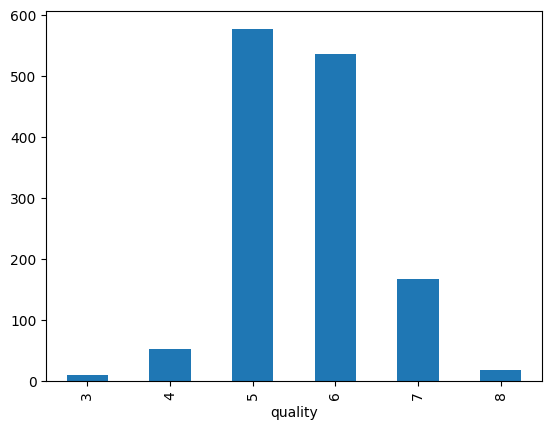

In [100]:
df['quality'].value_counts().sort_index().plot(kind='bar')

In [101]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv("winequality-red.csv")

# Separate features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [102]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

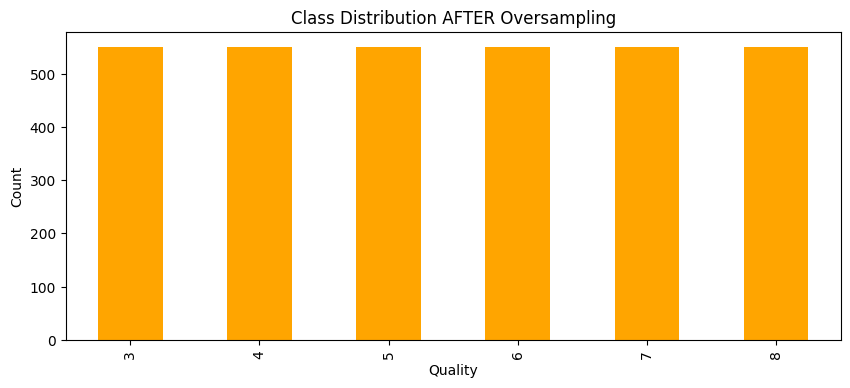

In [103]:
plt.figure(figsize=(10,4))
y_resampled.value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Class Distribution AFTER Oversampling")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [104]:
df.shape

(1599, 12)

In [105]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

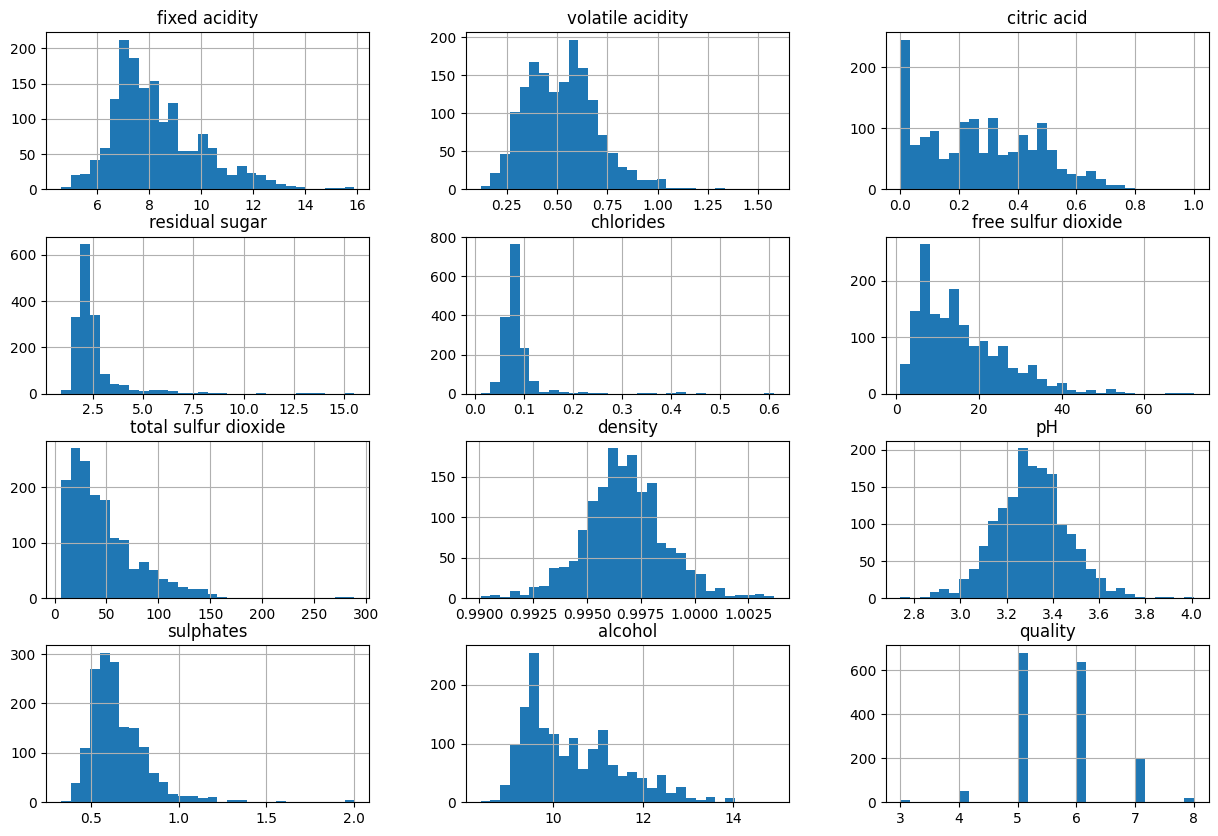

In [106]:
df.hist(bins=30, figsize=(15,10))
plt.show()


Skewness after log transformation:
fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64


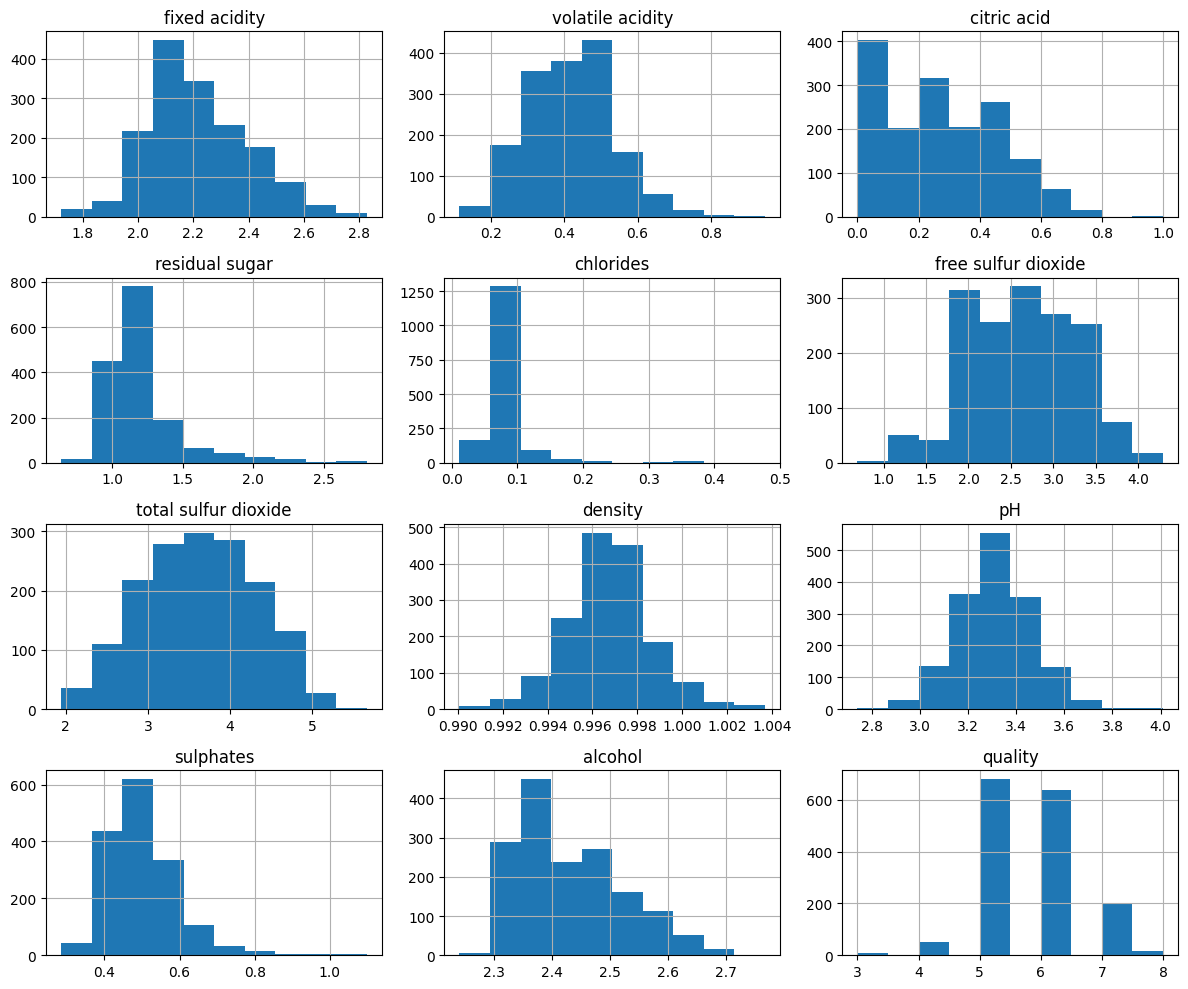

In [107]:
skewed_cols = [col for col in df.columns if df[col].skew() > 0.5]
df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log1p(x))

skewness_transformed = df.skew()
print("\nSkewness after log transformation:")
print(skewness_transformed)

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [108]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,5
1,2.174752,0.631272,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546,5
2,2.174752,0.565314,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546,5
3,2.501436,0.246860,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546,6
4,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347,5
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436,6
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907,6
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914,5


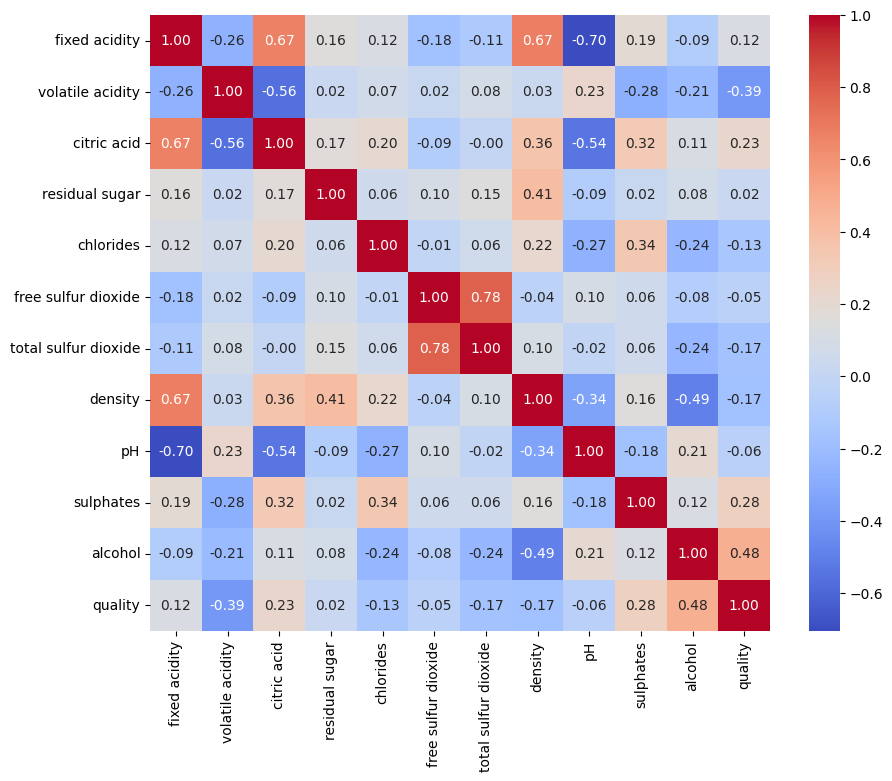

In [109]:
df.corr()   
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [110]:
df.to_csv('modified.csv', index=False)